In [37]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from plotly import graph_objects as go
import prince


In [38]:
dtafile = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'

df = pd.read_stata(dtafile)
df.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [39]:
df['age_bin'] = pd.cut(df['ppage'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

df = df.drop(['ppage', 'CASEID_NEW', 'CaseID','weight1', 'weight1_freqwt', 'weight2', 'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt'], axis=1)
df = df.astype(str)

# filling with most common class
df = df.loc[:, df.isin([' ','NULL']).mean() < .6]
df = df.replace(['nan'], 'unknown')
df.head()

,qflag,duration,speed_flag,consent,xlgb,S1,S2,S3,DOV_Branch,Q3_Refused,...,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,age_bin
0,Qualified,9,Completed survey in over 2 minutes,"Yes, I agree to participate",LGB sample,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,unknown,...,no,no,no,White,no,12.0,14.0,12.0,14.0,20-30
1,Qualified,11,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,no,yes,White,no,12.0,16.0,17.0,17.0,50-60
2,Qualified,7,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,no,no,White,no,9.0,7.5,14.0,17.0,40-50
3,Qualified,5,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,unknown,...,no,no,no,White,no,16.0,12.0,12.0,12.0,20-30
4,Qualified,13,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,yes,no,White,no,14.0,17.0,16.0,16.0,50-60


# FAIL ANALYSIS 1 MCA

In [40]:
mca = prince.MCA()
mca.fit(df)

MCA()

In [41]:
ax = churn_mca.plot_coordinates(
        X=churn1,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'churn_mca' is not defined

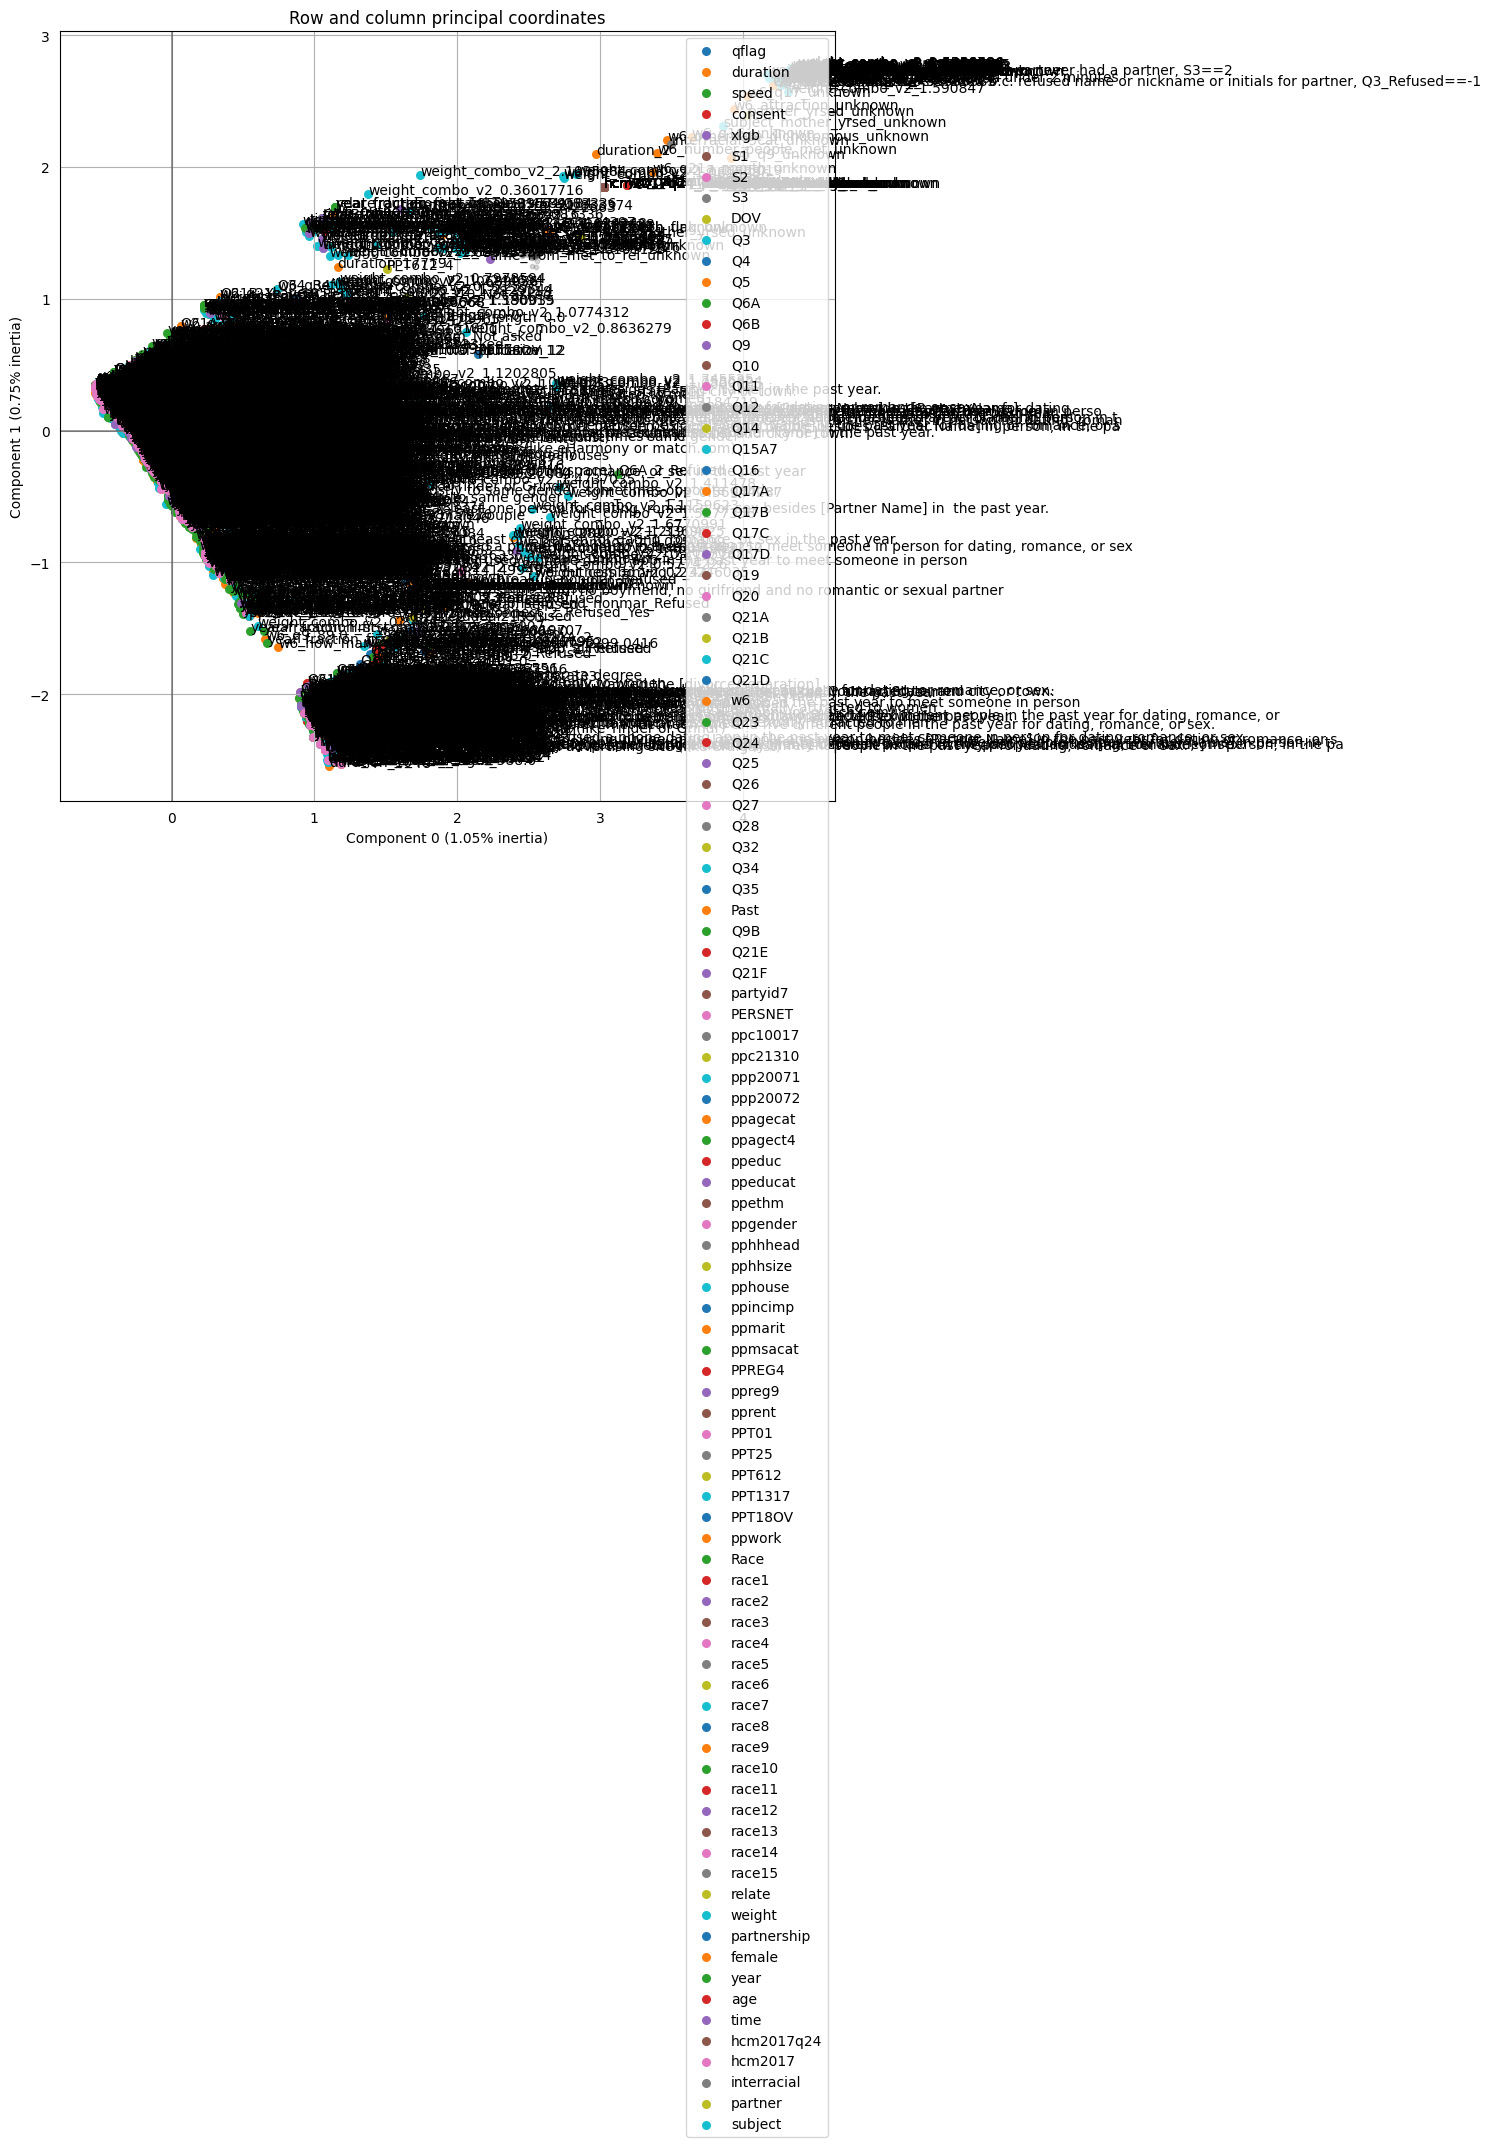

In [ ]:
mca.plot_coordinates(df,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

# MCA TRY 2

In [ ]:
mca_cols = df.columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())
df[mca_cols].head()

276 features used for MCA are ['qflag', 'duration', 'speed_flag', 'consent', 'xlgb', 'S1', 'S2', 'S3', 'DOV_Branch', 'Q3_Refused', 'Q4', 'Q5', 'Q6A', 'Q6B', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'Q15A7', 'Q16', 'Q16_Refused', 'Q17A', 'Q17B', 'Q17C', 'Q17D', 'Q19', 'Q20', 'Q21A_Year', 'Q21A_Month', 'Q21B_Year', 'Q21B_Month', 'Q21C_Year', 'Q21C_Month', 'Q21D_Year', 'Q21D_Month', 'w6_identity', 'w6_outness', 'w6_outness_timing', 'Q23', 'Q24_Refused', 'Q25', 'Q26', 'Q27', 'Q28', 'w6_friend_connect_1', 'w6_friend_connect_2', 'w6_friend_connect_3', 'w6_friend_connect_4', 'w6_friend_connect_Refused', 'Q32', 'Q34', 'Q35_Refused', 'w6_sex_frequency', 'w6_otherdate', 'w6_how_many', 'w6_how_meet_Refused', 'w6_otherdate_app', 'w6_how_many_app', 'Past_Partner_Q1', 'w6_relationship_end_nonmar', 'w6_breakup_nonmar', 'w6_relationship_end_mar', 'w6_who_breakup', 'Q5_2', 'Q6A_2', 'Q9B_2', 'Q10_2', 'Q11_2', 'Q12_2', 'Q14_2', 'Q15A7_2_1', 'Q16_2', 'Q16_2_Codes', 'Q17B_2', 'Q17C_2', 'Q17D_2', 'Q20_2', 'Q21A_2_

,qflag,duration,speed_flag,consent,xlgb,S1,S2,S3,DOV_Branch,Q3_Refused,...,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,age_bin
0,Qualified,9,Completed survey in over 2 minutes,"Yes, I agree to participate",LGB sample,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,unknown,...,no,no,no,White,no,12.0,14.0,12.0,14.0,20-30
1,Qualified,11,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,no,yes,White,no,12.0,16.0,17.0,17.0,50-60
2,Qualified,7,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,no,no,White,no,9.0,7.5,14.0,17.0,40-50
3,Qualified,5,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"No, I am not Married","No, I am single, with no boyfriend, no girlfri...",Yes,2,unknown,...,no,no,no,White,no,16.0,12.0,12.0,12.0,20-30
4,Qualified,13,Completed survey in over 2 minutes,"Yes, I agree to participate",gen pop,"Yes, I am Married",unknown,unknown,1,unknown,...,no,yes,no,White,no,14.0,17.0,16.0,16.0,50-60


In [48]:
# instantiate MCA class
mca = prince.MCA(n_components = 10)

# get principal components
mca = mca.fit(df[mca_cols])

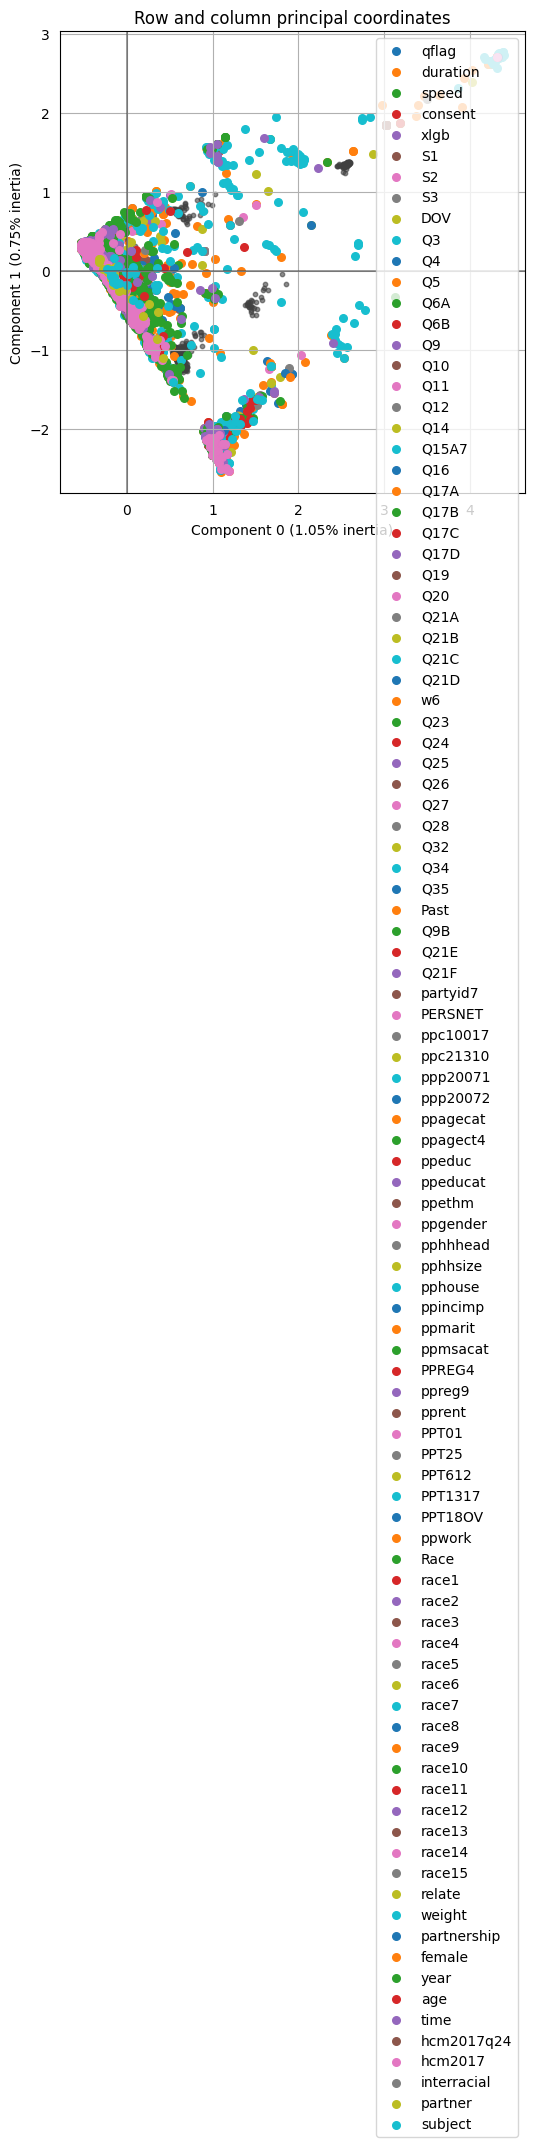

In [49]:
#project categories onto mca copmonents
# implicitly calls transform(X)
# what we want to see is for the points belonging to the same color to be as far apart as possible, for all colors
ax = mca.plot_coordinates(df[mca_cols])
#ax.get_figure().savefig('MCAplot.svg')


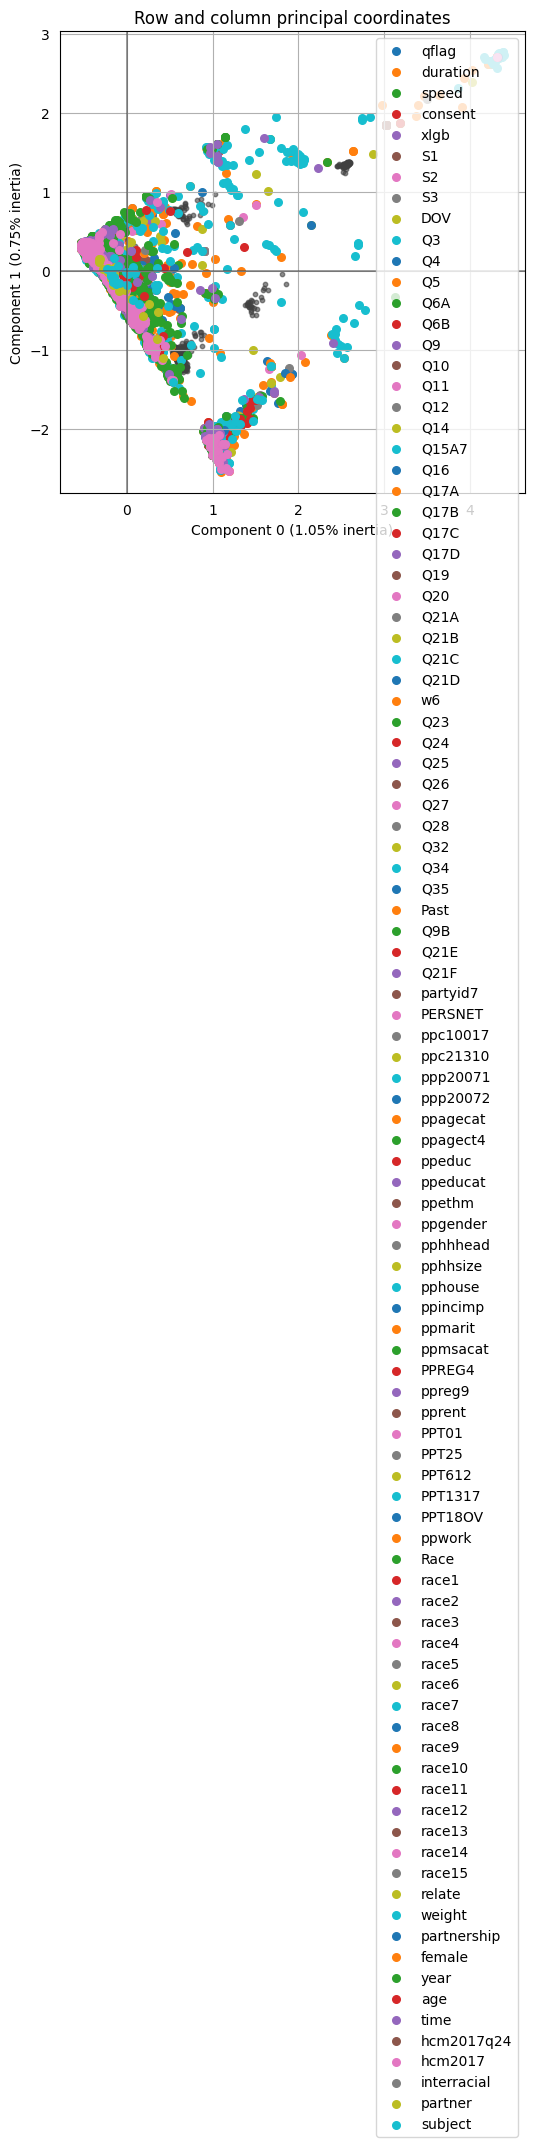

In [42]:
ax = mca.plot_coordinates(
    X=df[mca_cols],
    ax=None,
    figsize=(6, 6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1)

In [50]:
mca.row_coordinates(df)

,0,1,2,3,4,5,6,7,8,9
0,0.635662,-1.153768,0.564886,-0.210955,0.165937,-0.210642,-0.375123,0.323410,0.023358,0.013336
1,-0.292061,0.178478,-0.214392,0.010788,0.190061,-0.218066,0.165973,0.015171,-0.081654,0.087309
2,-0.293701,0.150235,-0.007705,-0.030963,0.093843,-0.101880,0.233497,-0.061684,0.070068,-0.141939
3,0.633833,-1.079575,0.343916,-0.151977,0.184539,-0.304540,-0.200871,0.107756,0.216555,-0.173226
4,-0.305456,0.164330,-0.176252,-0.014806,0.112579,-0.263075,-0.012045,0.159800,-0.119965,0.117169
...,...,...,...,...,...,...,...,...,...,...
3505,-0.259914,0.115280,0.432684,-0.125388,-0.063390,-0.062182,0.072319,0.249925,-0.123129,-0.139355
3506,-0.136175,0.018739,0.786866,-0.185507,-0.200174,0.217816,-0.204699,0.173609,-0.128302,0.047143
3507,-0.273681,0.077536,0.624712,-0.206099,0.084740,-0.027379,0.104566,0.413225,-0.271299,-0.215321
3508,-0.206992,0.061849,0.668975,-0.136286,-0.084849,-0.010027,0.107314,0.330875,-0.223123,-0.174943


,0,1
qflag_Not Qualified,4.324492,2.699778
qflag_Qualified,-0.147802,-0.092273
duration_0,4.332068,2.709638
duration_1,4.334839,2.698334
duration_10,-0.187008,-0.059740
...,...,...
age_bin_50-60,-0.162583,-0.005588
age_bin_60-70,-0.085134,-0.108431
age_bin_70-80,-0.069790,-0.197488
age_bin_80-90,-0.014713,-0.087171
